In [3]:
import branch_and_bound as bnb
import twice_around_the_tree as tat
import christofides as cr
import instance_generator as ig
import utils
import time
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_20762/886800750.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftat.groupby(["size", "dist"]).mean()["time"].unstack().plot()


Text(0, 0.5, 'time (s)')

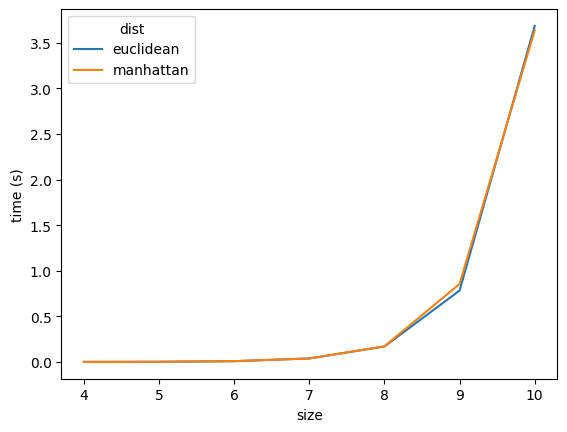

In [30]:
dftat = pd.read_csv("data/twice_around_the_tree.csv")
dftat.groupby(["size", "dist"]).mean()["time"].unstack().plot()
plt.ylabel("time (s)")

/tmp/ipykernel_20762/579949823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftat.groupby(["size", "dist"]).mean()["cost"].unstack().plot()


Text(0, 0.5, 'cost')

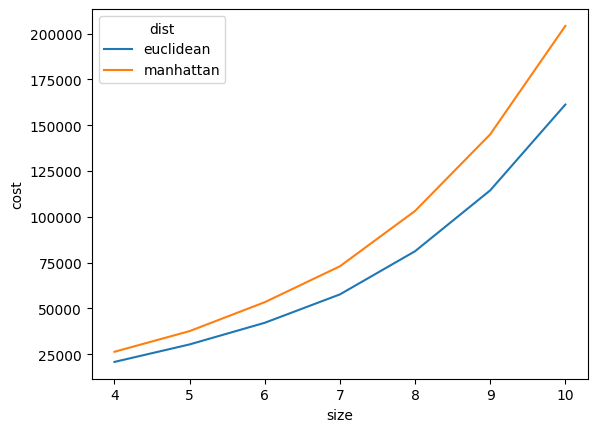

In [31]:
dftat.groupby(["size", "dist"]).mean()["cost"].unstack().plot()
plt.ylabel("cost")